In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/merged_restaurant_data.csv')

print(data.head(20))



    Unnamed: 0             business_id                   name  \
0          126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
1          126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
2          126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
3          126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
4          132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
5          132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
6          132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
7          132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
8          132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
9          132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
10         132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
11         132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
12         132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
13         132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   
14         132  9C2rpb56a

In [ ]:
# To see all column names (attributes) in the DataFrame:
print(data.columns.tolist())


['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'topic']


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer

# Create an 'overview' by combining 'name', 'categories', and 'attributes'
data['overview'] = data['name'].fillna('') + " " + data['categories'].fillna('') + " " + data['attributes'].fillna('')

# Convert the overview column to a numpy array
X = np.array(data['overview'])

text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1332 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/merged_restaurant_data.csv')
print(data.head())


   Unnamed: 0             business_id                   name  \
0         126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
1         126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
2         126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
3         126  anLQj9AM8vjbcLSIE0iUgg          Papa Murphy's   
4         132  9C2rpb56aQvW0ViZHK9sPw  Home Plate Sports Pub   

                           address    city state  postal_code   latitude  \
0  7250 North La Cholla, Suite 186  Tucson    AZ      85741.0  32.338572   
1  7250 North La Cholla, Suite 186  Tucson    AZ      85741.0  32.338572   
2  7250 North La Cholla, Suite 186  Tucson    AZ      85741.0  32.338572   
3  7250 North La Cholla, Suite 186  Tucson    AZ      85741.0  32.338572   
4                   4880 E 22nd St  Tucson    AZ      85711.0  32.206315   

    longitude  stars  review_count  is_open  \
0 -111.010760    4.0            22        1   
1 -111.010760    4.0            22        1   
2 -111.010760    

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load your data
df = pd.read_csv('/content/drive/MyDrive/merged_restaurant_data.csv')

# Create the combined_features column
df['categories'] = df['categories'].fillna('')
df['address'] = df['address'].fillna('')
df['city'] = df['city'].fillna('')
df['attributes'] = df['attributes'].fillna('')

df['combined_features'] = (
    df['categories'] + " " +
    df['address'] + " " +
    df['city'] + " " +
    df['attributes']
)

# Optional: Work with a subset of data for testing
df_small = df.sample(n=1000, random_state=42)

# Build the TF-IDF matrix with reduced features
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=5,
    max_features=5000  # Limit the vocabulary size
)
t0 = time.time()
tfidf_matrix = tfidf.fit_transform(df_small['combined_features'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("TF-IDF computation time: {:.2f} seconds".format(time.time() - t0))

# Compute the cosine similarity matrix using a linear kernel
t0 = time.time()
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("Cosine similarity matrix computed in {:.2f} seconds".format(time.time() - t0))


TF-IDF matrix shape: (1000, 277)
TF-IDF computation time: 0.47 seconds
Cosine similarity matrix computed in 0.23 seconds


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1) SAMPLE + RESET INDEX
df_small = df.sample(n=1000, random_state=42).reset_index(drop=True)

# 2) CREATE COMBINED FEATURES (assuming columns exist)
df_small['categories'] = df_small['categories'].fillna('')
df_small['address'] = df_small['address'].fillna('')
df_small['city'] = df_small['city'].fillna('')
df_small['attributes'] = df_small['attributes'].fillna('')

df_small['combined_features'] = (
    df_small['categories'] + " " +
    df_small['address'] + " " +
    df_small['city'] + " " +
    df_small['attributes']
)

# 3) TF-IDF
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=5,
    max_features=5000
)
tfidf_matrix = tfidf.fit_transform(df_small['combined_features'])

# 4) COSINE SIM
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 5) CREATE REVERSE MAPPING
indices_small = pd.Series(df_small.index, index=df_small['name']).drop_duplicates()

# 6) RECOMMENDATION FUNCTION
def get_recommendations(name, top_n=5):
    idx = indices_small.get(name)
    if idx is None:
        return "Restaurant not found in the subset."
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    restaurant_indices = [i[0] for i in sim_scores]
    return df_small['name'].iloc[restaurant_indices].values

# 7) TEST
restaurant_to_check = df_small['name'].iloc[0]
print("Restaurant to check:", restaurant_to_check)
recommendations = get_recommendations(restaurant_to_check, top_n=5)
print("Recommendations:", recommendations)


Restaurant to check: The Habit Burger Grill
Recommendations: ['In-N-Out Burger' 'Subway' 'Monkey Burger' 'Viva Burrito' 'Toast 101']


In [ ]:
restaurant_to_check = df_small['name'].iloc[0]
recommended_indices = get_recommendations(restaurant_to_check, top_n=5, return_indices=True)

# Now recommended_indices is available outside the function
recommended_df = df_small.iloc[recommended_indices]
print(recommended_df[['name', 'address', 'city', 'stars']])


                name                        address    city  stars
251  In-N-Out Burger           7111 E Broadway Blvd  Tucson    4.0
403           Subway             3 -160, Pad 3 -160  Tucson    3.0
382    Monkey Burger  5350 E Broadway Blvd, Ste 128  Tucson    4.0
858     Viva Burrito           8555 E Broadway Blvd  Tucson    2.0
344        Toast 101           4699 E Speedway Blvd  Tucson    3.0


In [ ]:
restaurant_to_check = df_small['name'].iloc[50]


In [ ]:
print(df_small['name'].unique())


['The Habit Burger Grill' "Pat's Drive In" 'Barista Del Barrio'
 'Aqui Con el Nene' "Domino's Pizza" 'Union Public House'
 'Fresh Sushi Pho' 'El Guero Canelo' 'Med Cuisine' "Dickey's Barbecue Pit"
 'Time Market' 'Sushi Nara' 'Zio Peppe' "Bobo's Restaurant" "eegee's"
 'China Szechwan' 'Locale Neighborhood Italian' "Kenney D's"
 'Pei Wei Asian Kitchen' 'Cardenas Ranch Markets'
 'Lee Lee International Supermarkets' "Baggin's Gourmet Sandwiches"
 'Rancheros Market' 'Kazoku' "Dave & Buster's" 'Raptor Canyon Cafe'
 "Famous Dave's Bar-B-Que" 'Taegukgi' 'Los Bertos' 'NI HAO TEA' 'Cielos'
 'El Antojo Poblano' 'Sonoran Brunch Company' 'La Parrilla Suiza'
 'Poco & Moms' 'Juice N Fruit Raspados' 'El Charro Cafe'
 'Jun Dynasty Chinese Restaurant' 'Snooze An AM Eatery' 'Postino Grant'
 'Penca' 'Ciao Down' 'Catalina Barbeque Co. & Sports Bar'
 "Freddy's Frozen Custard & Steakburgers" 'Chipotle Mexican Grill'
 'Guadalajara Grill - Mexican, Best Mexican Restaurant in Tucson'
 "Culver's" 'Texas Roadhous

In [ ]:
print(df_small['name'].head(10))


0    The Habit Burger Grill
1            Pat's Drive In
2        Barista Del Barrio
3          Aqui Con el Nene
4            Domino's Pizza
5        Union Public House
6           Fresh Sushi Pho
7           El Guero Canelo
8               Med Cuisine
9     Dickey's Barbecue Pit
Name: name, dtype: object


In [ ]:
print(df.columns.tolist())


['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'topic', 'combined_features']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2)
tfidf_matrix = tfidf.fit_transform(df['combined_features'])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1) Use a sample subset and reset the index so it goes from 0 to n-1
df_small = df.sample(n=1000, random_state=42).reset_index(drop=True)

# 2) Create the combined_features column
df_small['categories'] = df_small['categories'].fillna('')
df_small['address'] = df_small['address'].fillna('')
df_small['city'] = df_small['city'].fillna('')
df_small['attributes'] = df_small['attributes'].fillna('')

df_small['combined_features'] = df_small['categories'] + " " + df_small['address'] + " " + df_small['city'] + " " + df_small['attributes']

# 3) Build the TF-IDF matrix and cosine similarity matrix using df_small
tfidf = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2, max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_small['combined_features'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 4) Create a reverse mapping from restaurant names in df_small to their indices
indices_small = pd.Series(df_small.index, index=df_small['name']).drop_duplicates()

# 5) Define the recommendation function using df_small and cosine_sim
def get_recommendations(name, top_n=5):
    idx = indices_small.get(name)
    if idx is None:
        return f"Restaurant '{name}' not found in the sample dataset."

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    rec_indices = [i[0] for i in sim_scores]
    return df_small['name'].iloc[rec_indices].values

# 6) Test the function with a restaurant name that exists in df_small.
# Print some names from df_small to choose one
print("Sample restaurant names:")
print(df_small['name'].head(10).tolist())

# Choose a restaurant from the printed list, e.g., "The Habit Burger Grill" if it exists.
restaurant_to_check = "The Habit Burger Grill"
recommendations = get_recommendations(restaurant_to_check, top_n=5)

print(f"Top 5 recommendations for '{restaurant_to_check}':")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for i, rec in enumerate(recommendations, start=1):
        print(f"{i}. {rec}")


Sample restaurant names:
['The Habit Burger Grill', "Pat's Drive In", 'Barista Del Barrio', 'Aqui Con el Nene', "Domino's Pizza", 'Union Public House', 'Fresh Sushi Pho', 'El Guero Canelo', 'Med Cuisine', "Dickey's Barbecue Pit"]
Top 5 recommendations for 'The Habit Burger Grill':
1. In-N-Out Burger
2. Pollo Feliz
3. In-N-Out Burger
4. Black Bear Diner
5. McDonald's


In [ ]:
recs = get_recommendations("The Habit Burger Grill", top_n=10)
unique_recs = []
for rec in recs:
    if rec not in unique_recs:
        unique_recs.append(rec)
    if len(unique_recs) == 5:
        break
print("Top 5 unique recommendations:", unique_recs)


Top 5 unique recommendations: ['In-N-Out Burger', 'Pollo Feliz', 'Black Bear Diner', "McDonald's", "C.I. Chu's Mongolian Barbeque"]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1) LOAD YOUR REAL DATA
df_small = pd.read_csv("/content/drive/MyDrive/merged_restaurant_data.csv")

# Optional: sample 1000 rows to avoid large memory usage, then reset the index
df_small = df_small.sample(n=1000, random_state=42).reset_index(drop=True)

# 2) CREATE THE COMBINED FEATURES COLUMN
#    Fill missing values and concatenate relevant columns
for col in ['categories', 'address', 'city', 'attributes']:
    df_small[col] = df_small[col].fillna('')

df_small['combined_features'] = (
    df_small['categories'] + " " +
    df_small['address'] + " " +
    df_small['city'] + " " +
    df_small['attributes']
)

# 3) BUILD THE TF-IDF MATRIX
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=2,
    max_features=5000
)
tfidf_matrix = tfidf.fit_transform(df_small['combined_features'])

# 4) COMPUTE THE COSINE SIMILARITY MATRIX
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 5) DEFINE THE RECOMMENDATION FUNCTION
def give_recommendations(
    index,
    print_recommendation=True,
    print_recommendation_plots=True,
    print_categories=True
):


    # Sort by similarity score in descending order
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Skip the first one (the restaurant itself) and take top 5
    sim_scores = sim_scores[1:6]
    rec_indices = [i[0] for i in sim_scores]

    # Gather recommended restaurants
    restaurants_recomm = df_small['name'].iloc[rec_indices].values

    # Prepare a result dictionary
    result = {
        'Restaurants': restaurants_recomm,
        'Index': rec_indices
    }

    # 1) Print main recommendation info
    if print_recommendation:
        watched_name = df_small['name'].iloc[index]
        print(f"The watched restaurant is this one: {watched_name} \n")
        for k, restaurant in enumerate(restaurants_recomm, start=1):
            print(f"The number {k} recommended restaurant is this one: {restaurant} \n")

    # 2) Print "plot" (combined_features)
    if print_recommendation_plots:
        watched_plot = df_small['combined_features'].iloc[index]
        print(f"The 'plot' of the watched restaurant is:\n{watched_plot} \n")
        for k, idx_rec in enumerate(rec_indices, start=1):
            print(f"The 'plot' of the number {k} recommended restaurant is:\n{df_small['combined_features'].iloc[idx_rec]} \n")

    # 3) Print "categories"
    if print_categories:
        watched_cat = df_small['categories'].iloc[index]
        print(f"The categories of the watched restaurant is:\n{watched_cat} \n")
        for k, idx_rec in enumerate(rec_indices, start=1):
            print(f"The categories of the number {k} recommended restaurant is:\n{df_small['categories'].iloc[idx_rec]} \n")

    return result

# 6) TEST THE FUNCTION WITH A VALID INDEX
#    For example, pick index=0 if df_small has at least 1 row.
#    Or pick any index up to len(df_small)-1.

test_index = 0
recommendations = give_recommendations(
    index=test_index,
    print_recommendation=True,
    print_recommendation_plots=True,
    print_categories=True
)

print("Returned dictionary:", recommendations)


The watched restaurant is this one: The Habit Burger Grill 

The number 1 recommended restaurant is this one: In-N-Out Burger 

The number 2 recommended restaurant is this one: Pollo Feliz 

The number 3 recommended restaurant is this one: In-N-Out Burger 

The number 4 recommended restaurant is this one: Black Bear Diner 

The number 5 recommended restaurant is this one: McDonald's 

The 'plot' of the watched restaurant is:
Burgers, Restaurants, Sandwiches, Fast Food 5721 E Broadway Blvd Tucson {'BusinessAcceptsCreditCards': 'True', 'RestaurantsReservations': 'False', 'RestaurantsAttire': "'casual'", 'WiFi': "'no'", 'HasTV': 'True', 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'NoiseLevel': "'average'", 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}", 'DriveThru': 'True', 'DogsAllowed': 'False', 'OutdoorSeating': 'True', '

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# 1. LOAD REAL DATA (SAMPLE)

df_small = pd.read_csv("/content/drive/MyDrive/merged_restaurant_data.csv")
df_small = df_small.sample(n=1000, random_state=42).reset_index(drop=True)


# 2. CREATE COMBINED FEATURES

for col in ['categories', 'address', 'city', 'attributes']:
    df_small[col] = df_small[col].fillna('')

df_small['combined_features'] = (
    df_small['categories'] + " " +
    df_small['address'] + " " +
    df_small['city'] + " " +
    df_small['attributes']
)

# 3. TF-IDF AND COSINE SIMILARITY

tfidf = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2, max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_small['combined_features'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a reverse mapping from restaurant names to indices (drop duplicates)
indices_small = pd.Series(df_small.index, index=df_small['name']).drop_duplicates()

# 4. DEFINE THE RECOMMENDATION FUNCTION WITH DUPLICATE REMOVAL

def give_recommendations(index, top_n=5,
                         print_recommendation=True,
                         print_recommendation_plots=True,
                         print_categories=True):

    # Get similarity scores for the given index, sort descending and skip the restaurant itself.
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+6]
    # In case there are duplicates, we fetch extra candidates and then filter.
    rec_indices = [i[0] for i in sim_scores]

    # Retrieve recommended restaurant names based on indices.
    all_recs = df_small['name'].iloc[rec_indices].values

    # Remove duplicates while preserving order
    unique_recs = []
    unique_indices = []
    for idx, rec in zip(rec_indices, all_recs):
        if rec not in unique_recs:
            unique_recs.append(rec)
            unique_indices.append(idx)
        if len(unique_recs) == top_n:
            break

    result = {'Restaurants': unique_recs, 'Index': unique_indices}

    # 1) Print the main recommendation info
    if print_recommendation:
        watched_name = df_small['name'].iloc[index]
        print(f"The watched restaurant is this one: {watched_name} \n")
        for k, restaurant in enumerate(unique_recs, start=1):
            print(f"The number {k} recommended restaurant is this one: {restaurant} \n")

    # 2) Print the "plot" (combined_features)
    if print_recommendation_plots:
        print(f"The 'plot' of the watched restaurant is:\n{df_small['combined_features'].iloc[index]} \n")
        for k, idx_rec in enumerate(unique_indices, start=1):
            print(f"The 'plot' of the number {k} recommended restaurant is:\n{df_small['combined_features'].iloc[idx_rec]} \n")

    # 3) Print the "categories"
    if print_categories:
        print(f"The categories of the watched restaurant is:\n{df_small['categories'].iloc[index]} \n")
        for k, idx_rec in enumerate(unique_indices, start=1):
            print(f"The categories of the number {k} recommended restaurant is:\n{df_small['categories'].iloc[idx_rec]} \n")

    return result
test_index = 0  # Change this index as needed.
recommendations = give_recommendations(
    index=test_index,
    top_n=5,
    print_recommendation=True,
    print_recommendation_plots=True,
    print_categories=True
)

print("Returned dictionary:", recommendations)


The watched restaurant is this one: The Habit Burger Grill 

The number 1 recommended restaurant is this one: In-N-Out Burger 

The number 2 recommended restaurant is this one: Pollo Feliz 

The number 3 recommended restaurant is this one: Black Bear Diner 

The number 4 recommended restaurant is this one: McDonald's 

The number 5 recommended restaurant is this one: C.I. Chu's Mongolian Barbeque 

The 'plot' of the watched restaurant is:
Burgers, Restaurants, Sandwiches, Fast Food 5721 E Broadway Blvd Tucson {'BusinessAcceptsCreditCards': 'True', 'RestaurantsReservations': 'False', 'RestaurantsAttire': "'casual'", 'WiFi': "'no'", 'HasTV': 'True', 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'NoiseLevel': "'average'", 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}", 'DriveThru': 'True', 'DogsAllowed': 'False', 'OutdoorSeati

In [ ]:
# Example: get recommendations for the restaurant at index=2
# and print the main recommendations (e.g., recommended restaurants)
recommendations_2_main = give_recommendations(
    index=2,
    top_n=5,  # Number of recommendations you want
    print_recommendation=True,   # Print the recommended restaurants
    print_recommendation_plots=False  # Don't print plots this time
)




The watched restaurant is this one: Barista Del Barrio 

The number 1 recommended restaurant is this one: Barista Del Barrio 

The number 2 recommended restaurant is this one: Caffe Luce 

The number 3 recommended restaurant is this one: Cartel Roasting 

The number 4 recommended restaurant is this one: Coffee X Change 

The number 5 recommended restaurant is this one: El Minuto Cafe 

The categories of the watched restaurant is:
Restaurants, Food, Breakfast & Brunch, Coffee & Tea, Cafes 

The categories of the number 1 recommended restaurant is:
Restaurants, Food, Breakfast & Brunch, Coffee & Tea, Cafes 

The categories of the number 2 recommended restaurant is:
Food, Restaurants, Coffee & Tea, Cafes 

The categories of the number 3 recommended restaurant is:
Restaurants, Food, Coffee & Tea, Cafes 

The categories of the number 4 recommended restaurant is:
Restaurants, Sandwiches, Food, Coffee & Tea, Burgers 

The categories of the number 5 recommended restaurant is:
Food, Restaurants

In [ ]:
# get recommendations for the restaurant at index=2
# but only print the “plot” or combined features
recommendations_2_plot = give_recommendations(
    index=2,
    top_n=5,
    print_recommendation=False,   # Don't print the recommended restaurants
    print_recommendation_plots=True  # Print the "plot" (combined features)
)


The 'plot' of the watched restaurant is:
Restaurants, Food, Breakfast & Brunch, Coffee & Tea, Cafes 1002 N Grande Ave Tucson {'HappyHour': 'False', 'HasTV': 'False', 'RestaurantsPriceRange2': '1', 'GoodForKids': 'True', 'Caters': 'False', 'RestaurantsAttire': "'casual'", 'RestaurantsTableService': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'BusinessAcceptsBitcoin': 'False', 'GoodForMeal': "{u'breakfast': True, u'brunch': None, u'lunch': True, u'dinner': False, u'latenight': None, u'dessert': None}", 'Ambience': "{u'divey': True, u'hipster': None, u'casual': True, u'touristy': False, u'trendy': True, u'intimate': None, u'romantic': False, u'classy': False, u'upscale': False}", 'WheelchairAccessible': 'True', 'Alcohol': "u'none'", 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}", 'BusinessAcceptsCreditCards': 'True', 'WiFi': 

In [ ]:

recommendations_10 = give_recommendations(
    index=10,
    top_n=5,
    print_recommendation=True,
    print_recommendation_plots=True,
    print_categories=False
)




The watched restaurant is this one: Time Market 

The number 1 recommended restaurant is this one: European Market & Deli 

The number 2 recommended restaurant is this one: Calle Tepa 

The number 3 recommended restaurant is this one: Rocco's Little Chicago 

The 'plot' of the watched restaurant is:
Restaurants, Food, Pizza, Delis, Beer, Wine & Spirits, Grocery 444 E University Blvd Tucson {'RestaurantsPriceRange2': '2', 'NoiseLevel': "u'average'", 'RestaurantsAttire': "'casual'", 'BusinessAcceptsCreditCards': 'True', 'WiFi': "u'no'", 'BYOBCorkage': "'yes_free'", 'Alcohol': "'beer_and_wine'", 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'Corkage': 'False', 'BikeParking': 'True', 'GoodForKids': 'True', 'HasTV': 'False', 'Ambience': "{'touristy': False, 'hipster': True, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}", 'RestaurantsGoodForGroups': 'True', 'BusinessParking': "{'garage': False, 'st

In [ ]:

recommendations_60 = give_recommendations(
    index=60,
    top_n=5,
    print_recommendation=True,
    print_recommendation_plots=True,
    print_categories=True
)

The watched restaurant is this one: Sachiko Sushi 

The number 1 recommended restaurant is this one: Sachiko Sushi 

The number 2 recommended restaurant is this one: Shogun Japanese Restaurant & Sushi Bar 

The number 3 recommended restaurant is this one: Kazoku 

The number 4 recommended restaurant is this one: O Sushi Restaurant 

The number 5 recommended restaurant is this one: Sushi Cortaro On River 

The 'plot' of the watched restaurant is:
Japanese, Restaurants, Sushi Bars 3210 E Valencia Rd Tucson {'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'True', 'OutdoorSeating': 'False', 'GoodForKids': 'True', 'RestaurantsAttire': "u'casual'", 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'NoiseLevel': "'average'", 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': Fal

In [ ]:
# Let's assume:
# 1) 'df_small' is your DataFrame with restaurants.
# 2) 'give_recommendations(i)' returns a dictionary with a key like 'Restaurants'
#    that contains a list of recommended restaurant names for the item at index i.
# 3) 'df_small' has a column 'name' for the watched restaurant.

# We'll store the top 5 recommendations for each item in a DataFrame.

recomm_list = []
for i in range(len(df_small)):
    # Call the recommendation function (no printing, just return)
    recomm_i = give_recommendations(i, top_n=5,
                                    print_recommendation=False,
                                    print_recommendation_plots=False,
                                    print_categories=False)
    # Extract the list of recommended restaurant names
    # (assuming the function returns {'Restaurants': [...], 'Index': [...]})
    recomm_list.append(recomm_i['Restaurants'])

# Create a DataFrame with columns for each recommendation
recomm_data = pd.DataFrame(
    recomm_list,
    columns=[
        'First Recommendation',
        'Second Recommendation',
        'Third Recommendation',
        'Fourth Recommendation',
        'Fifth Recommendation'
    ]
)

# Add a column for the watched restaurant name
recomm_data['Watched Restaurant'] = df_small['name']

# Reorder columns so 'Watched Restaurant' is first
recomm_data = recomm_data[
    [
        'Watched Restaurant',
        'First Recommendation',
        'Second Recommendation',
        'Third Recommendation',
        'Fourth Recommendation',
        'Fifth Recommendation'
    ]
]

# Now recomm_data has one row per restaurant, with the watched restaurant name
# and its top 5 recommendations.
print(recomm_data.head(10))  # show the first 10 rows


       Watched Restaurant          First Recommendation  \
0  The Habit Burger Grill               In-N-Out Burger   
1          Pat's Drive In                    Kenney D's   
2      Barista Del Barrio            Barista Del Barrio   
3        Aqui Con el Nene              Aqui Con el Nene   
4          Domino's Pizza  Maria Bonita Mexican Kitchen   
5      Union Public House            Union Public House   
6         Fresh Sushi Pho               Fresh Sushi Pho   
7         El Guero Canelo               El Guero Canelo   
8             Med Cuisine                   Med Cuisine   
9   Dickey's Barbecue Pit         Dickey's Barbecue Pit   

           Second Recommendation                     Third Recommendation  \
0                    Pollo Feliz                         Black Bear Diner   
1             Blake's Lotaburger                      Wings Over Broadway   
2                     Caffe Luce                          Cartel Roasting   
3                   Waffle House          

<ipython-input-46-253992282c88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=recomm_data['Watched Restaurant'], order=recomm_data['Watched Restaurant'].value_counts().index, palette="coolwarm")
<ipython-input-46-253992282c88>:6: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-253992282c88>:6: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


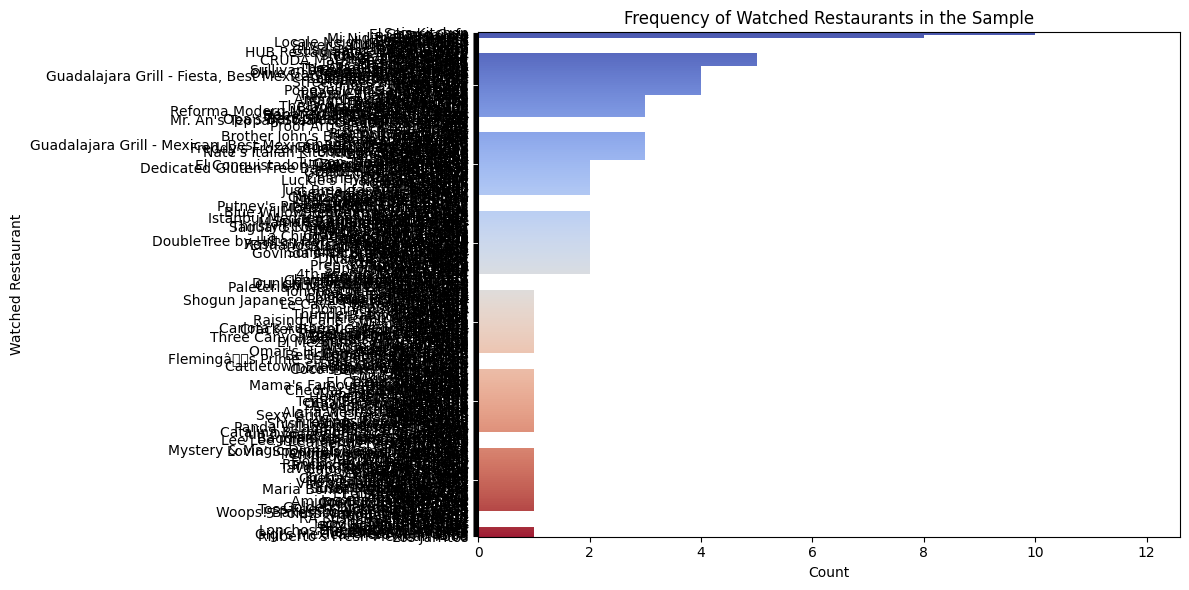

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=recomm_data['Watched Restaurant'], order=recomm_data['Watched Restaurant'].value_counts().index, palette="coolwarm")
plt.title("Frequency of Watched Restaurants in the Sample")
plt.xlabel("Count")
plt.ylabel("Watched Restaurant")
plt.tight_layout()
plt.show()


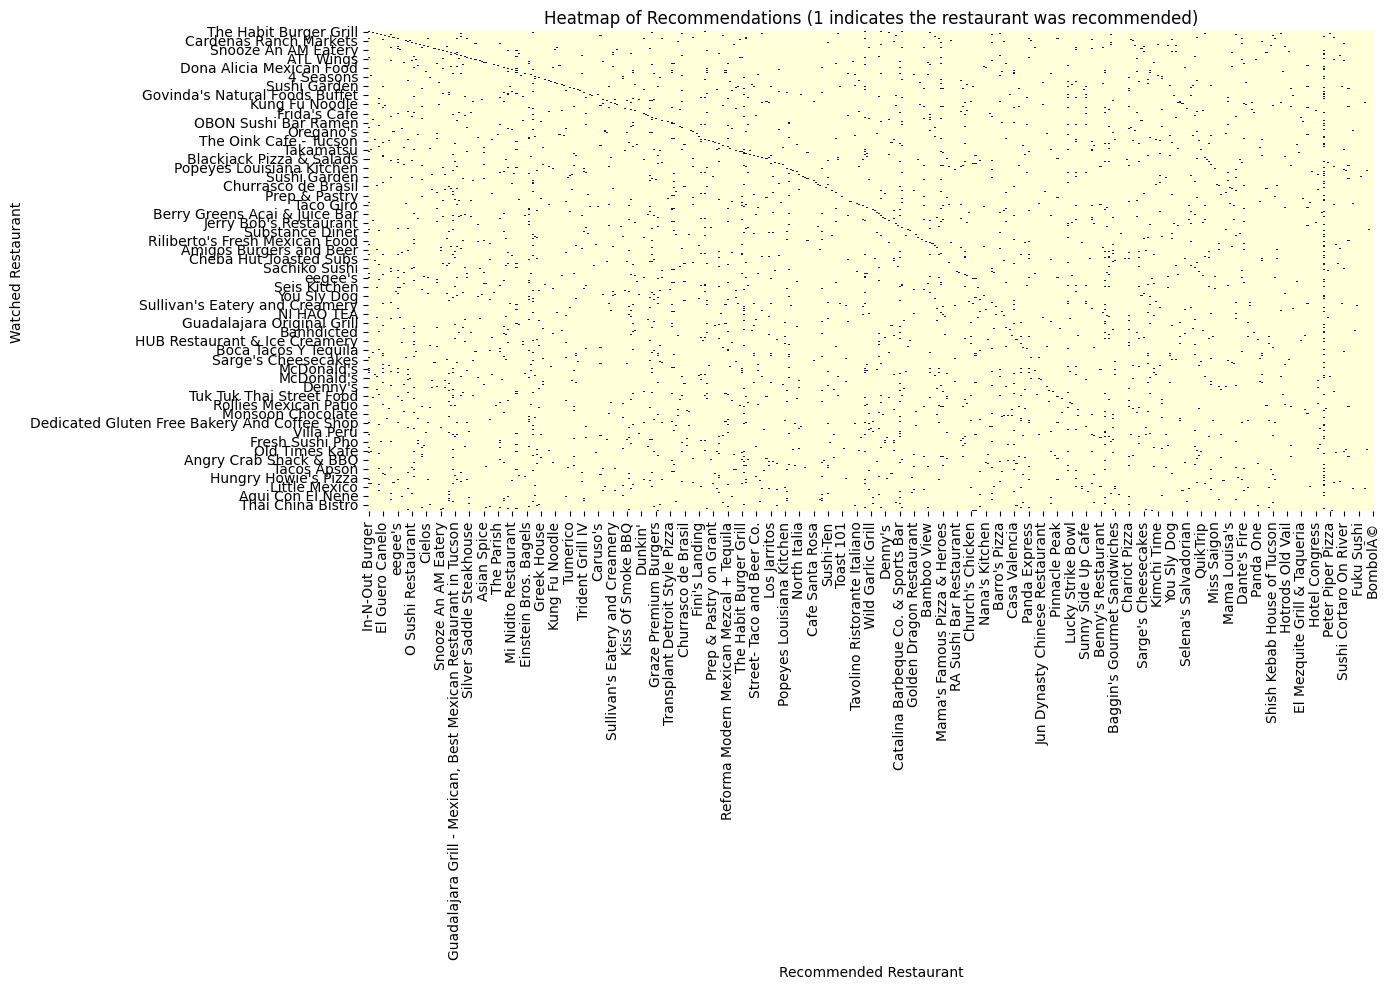

In [ ]:
# Create a DataFrame that indicates whether a restaurant was recommended for a watched restaurant
# We'll use the watched restaurant as index and flatten the recommended columns into a set per row.

# Create an empty DataFrame with watched restaurants as rows and unique recommended restaurants as columns.
unique_recs = pd.unique(pd.concat([
    recomm_data['First Recommendation'],
    recomm_data['Second Recommendation'],
    recomm_data['Third Recommendation'],
    recomm_data['Fourth Recommendation'],
    recomm_data['Fifth Recommendation']
]))

heatmap_data = pd.DataFrame(0, index=recomm_data['Watched Restaurant'], columns=unique_recs)

# Fill the DataFrame: 1 if a recommended restaurant appears for that watched restaurant
for idx, row in recomm_data.iterrows():
    for rec in [row['First Recommendation'], row['Second Recommendation'],
                row['Third Recommendation'], row['Fourth Recommendation'],
                row['Fifth Recommendation']]:
        heatmap_data.loc[row['Watched Restaurant'], rec] = 1

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar=False)
plt.title("Heatmap of Recommendations (1 indicates the restaurant was recommended)")
plt.xlabel("Recommended Restaurant")
plt.ylabel("Watched Restaurant")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_cosine_similarity_for_index(watched_index, top_n=5, label_top=True):
    """
    Plots the cosine similarity of every restaurant in df_small
    to the 'watched' restaurant at watched_index.

    - watched_index: index of the watched restaurant in df_small
    - top_n: how many top restaurants to label
    - label_top: if True, label the top_n points with their restaurant names
    """
    # Extract all similarity scores for this watched restaurant
    scores = cosine_sim[watched_index]  # array of length len(df_small)

    # Sort them in descending order (excluding the watched restaurant itself)
    # We only need the top_n to label them
    sorted_indices = scores.argsort()[::-1]  # from highest to lowest
    top_indices = [i for i in sorted_indices if i != watched_index][:top_n]

    # Prepare data for plotting: x = indices, y = similarity
    x_vals = range(len(scores))  # 0..len(df_small)-1
    y_vals = scores  # similarity scores

    # Plot the scatter
    plt.scatter(x_vals, y_vals, color='red', alpha=0.7, s=10)

    # Label the subplot with the watched restaurant name
    watched_name = df_small['name'].iloc[watched_index]
    plt.title(f"Restaurant Watched: {watched_name}")
    plt.xlabel("Restaurant Index")
    plt.ylabel("Cosine Similarity")

    # Optionally label the top_n points
    if label_top:
        for idx in top_indices:
            top_name = df_small['name'].iloc[idx]
            plt.text(idx, scores[idx], top_name, fontsize=8, ha='left', va='bottom')


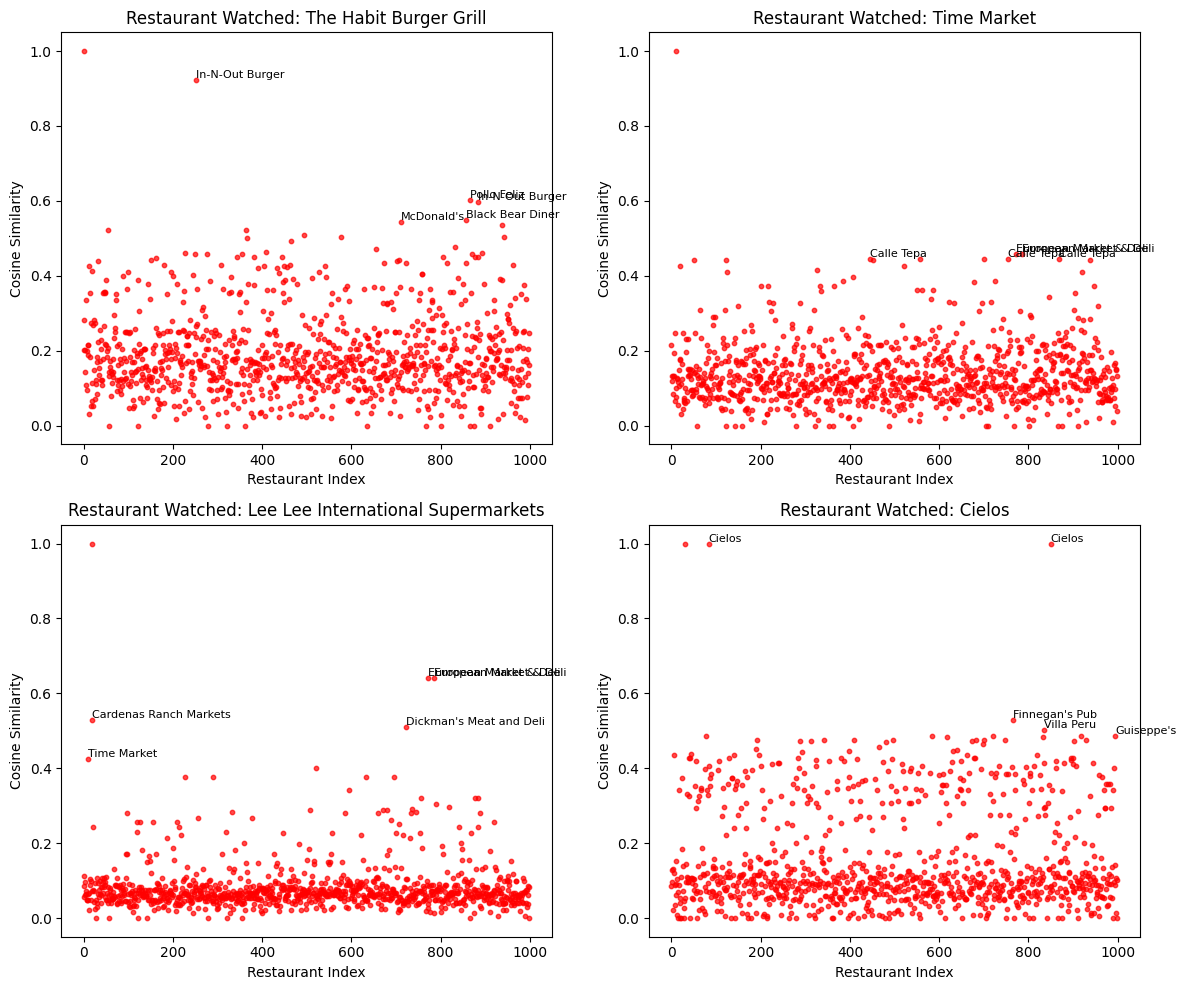

In [ ]:
import matplotlib.pyplot as plt

watched_indices = [0, 10, 20, 30]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    watched_idx = watched_indices[i]
    plt.sca(ax)
    plot_cosine_similarity_for_index(watched_idx, top_n=5, label_top=True)

plt.tight_layout()
plt.show()
